# How to access the EM and segmentation data from MICrONS Pinky 100 dataset using BossDB


This dataset consists of Electron Microscopy (EM) image data, segmentation data, and corresponding meshes of the cortical circuitry from the mouse visual cortex. This dataset was acquired and analyzed in the initial phase of the MICrONS project. It is a 250 x 140 x 90 µm volume from layer 2/3 of a P36 male mouse visual cortex imaged at 3.58 x 3.58 x 40 nm resolution with a dense segmentation, proofreading of all dendrites and axons of the 364 excitatory neurons in the volume, and dense synapse detection.

More information, including up to date release notes, can be found at the [MICrONS Explorer website](https://www.microns-explorer.org/phase1).

Further information can also be found on the [BossDB project page](https://bossdb.org/project/microns-pinky) for this dataset 

Here we will show you how use [`intern`](https://github.com/jhuapl-boss/intern) to access the EM and segmentation data that is hosted on BossDB.

In [1]:
from intern import array
import matplotlib.pyplot as plt
# for displaying links
from IPython.display import display, HTML

### Accessing the Electron Microscopy images

In [2]:
# electron microscopy data
em = array("bossdb://microns/pinky100/em")

In [3]:
# the size of the original resolution dataset
em.shape

(2177, 83968, 124928)

In [4]:
# get a link to the dataset on the Boss Management Console
display(HTML('<a href="{0}">Boss Management Console Link</a>'.format(em.url)))

In [5]:
# check the resolution of the data we are looking at
em.resolution

0

In [6]:
# check voxel size
em.voxel_size

((40.0, 4.0, 4.0), 'nanometers')

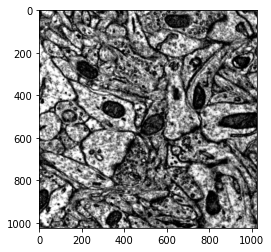

In [7]:
# let's download a slice cutout
em_data = em[824:825, 55000:56024, 79190:80214]
# and view it!
plt.imshow(em_data, cmap='gray')

In [8]:
# check the size of the cutout
em_data.shape

(1024, 1024)

In [9]:
# we can also view downsampled versions of this data
# let's check how many downsampled resolutions are available
em._exp.num_hierarchy_levels

9

In [10]:
# let's view data which has been downsampled just once
em_res_1 = array("bossdb://microns/pinky100/em", resolution=1)

In [11]:
em_res_1.shape

(2177, 41984, 62464)

In [12]:
em_res_1.resolution

1

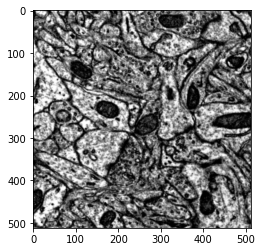

In [14]:
# let's download a slice cutout
em_data_res_1 = em_res_1[824:825, 27500:28012, 39595:40107]
# and view it!
plt.imshow(em_data_res_1, cmap='gray')

### Accessing the segmentation images

In [15]:
seg = array("bossdb://microns/pinky100_8x8x40/segmentation")

In [16]:
seg.shape

(2177, 40960, 61440)

In [17]:
seg.voxel_size

((40.0, 8.0, 8.0), 'nanometers')

In [18]:
seg.resolution

0

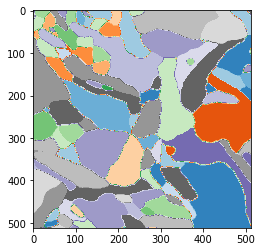

In [19]:
# let's download a slice cutout
seg_data = seg[824:825, 27500:28012, 39595:40107]
# and view it!
plt.imshow(seg_data.astype("uint8"), cmap='tab20c')

# we need to convert the seg data to unit8 instead of uint64 for visualization purposes

In [20]:
seg_data.dtype

dtype('uint64')

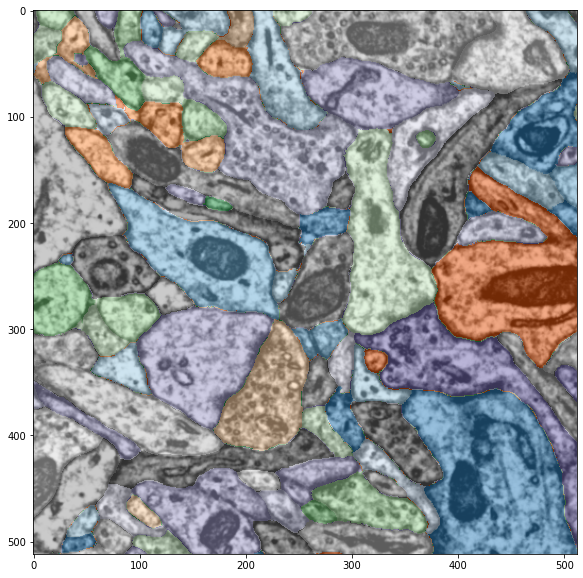

In [21]:
# lets view it overlaid on the EM data
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(em_data_res_1, cmap="Greys_r")
ax.imshow(seg_data.astype("uint8"), cmap="tab20c", alpha=0.5)
